# P1: Staggered Leapfrog para una Onda Viajera

M = 1000
delta = 50


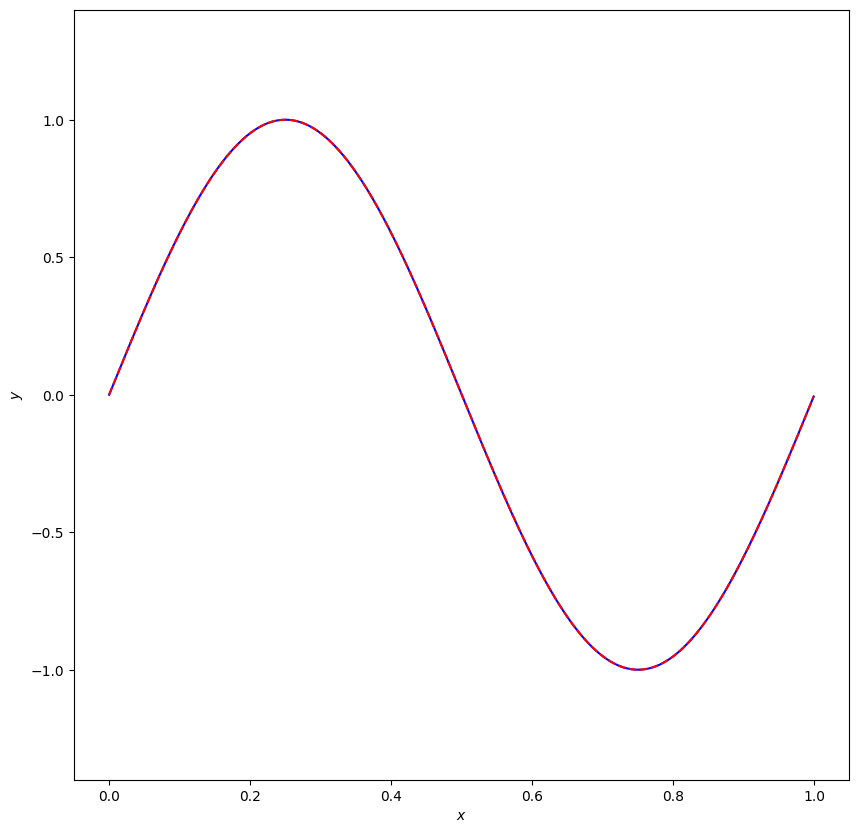

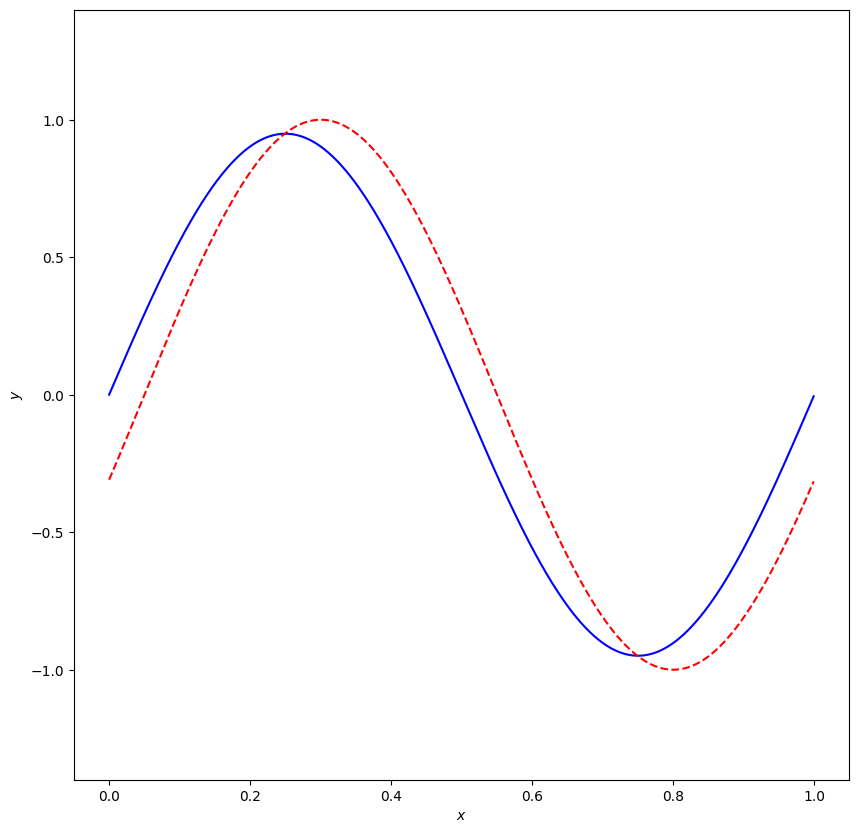

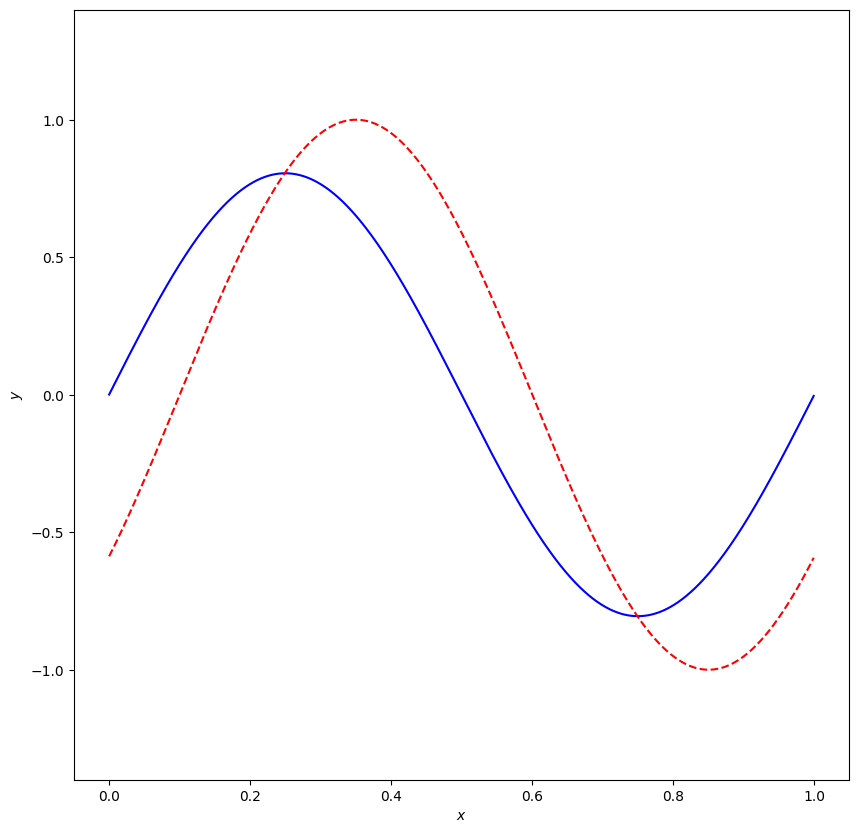

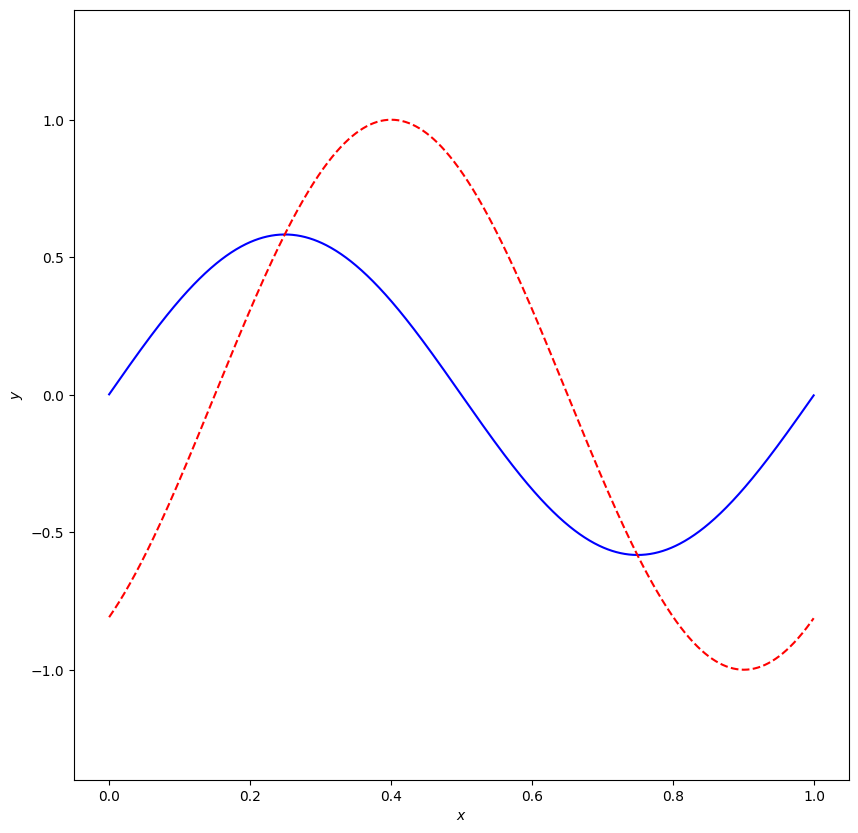

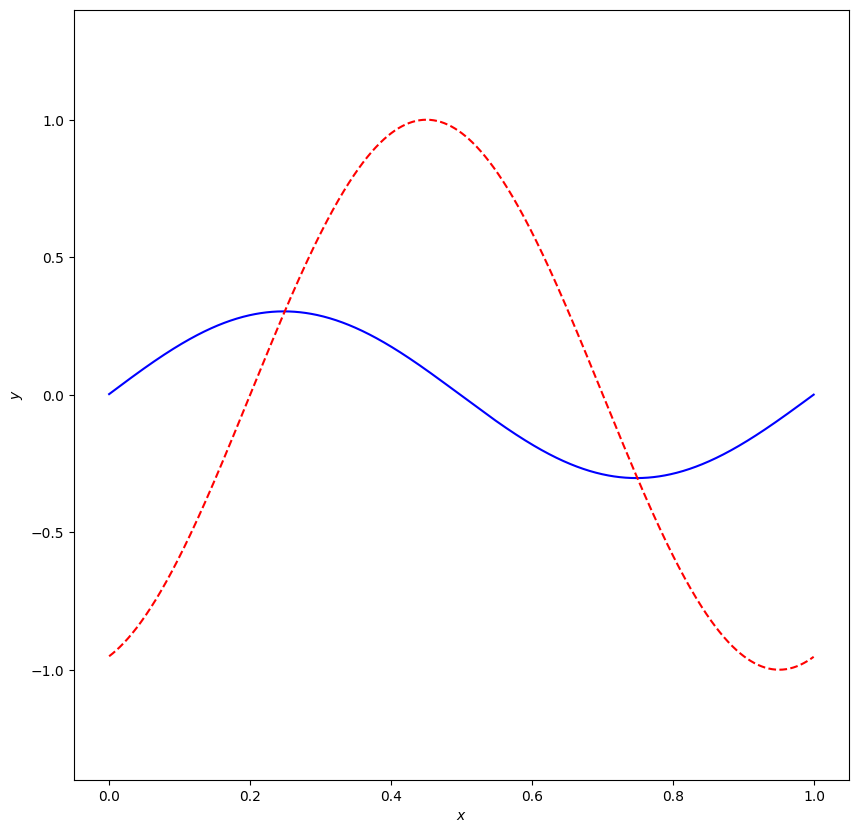

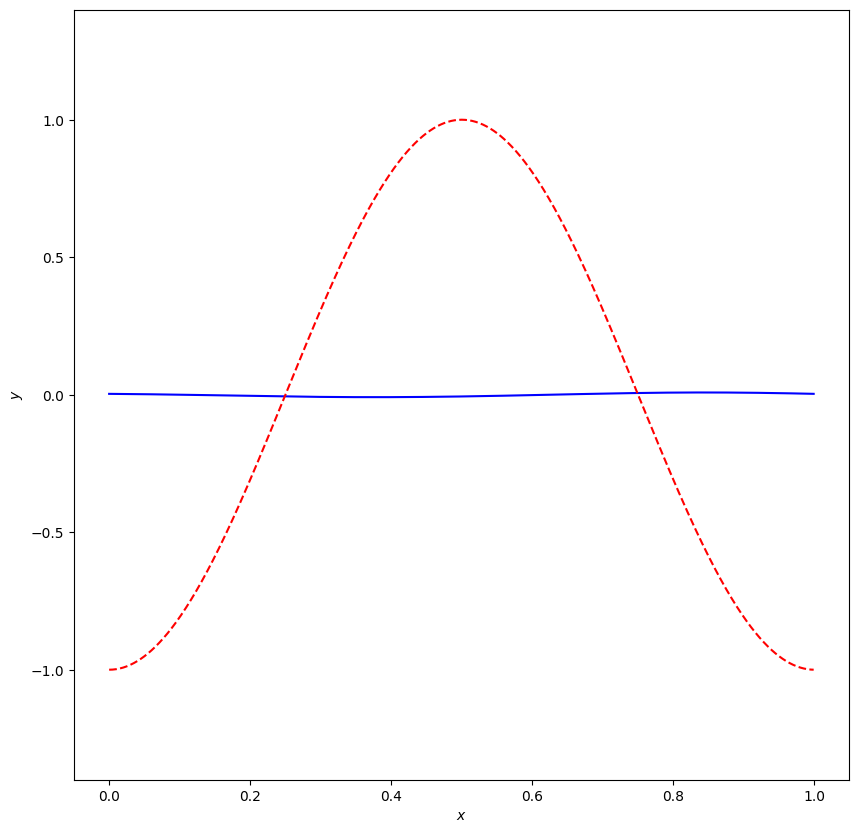

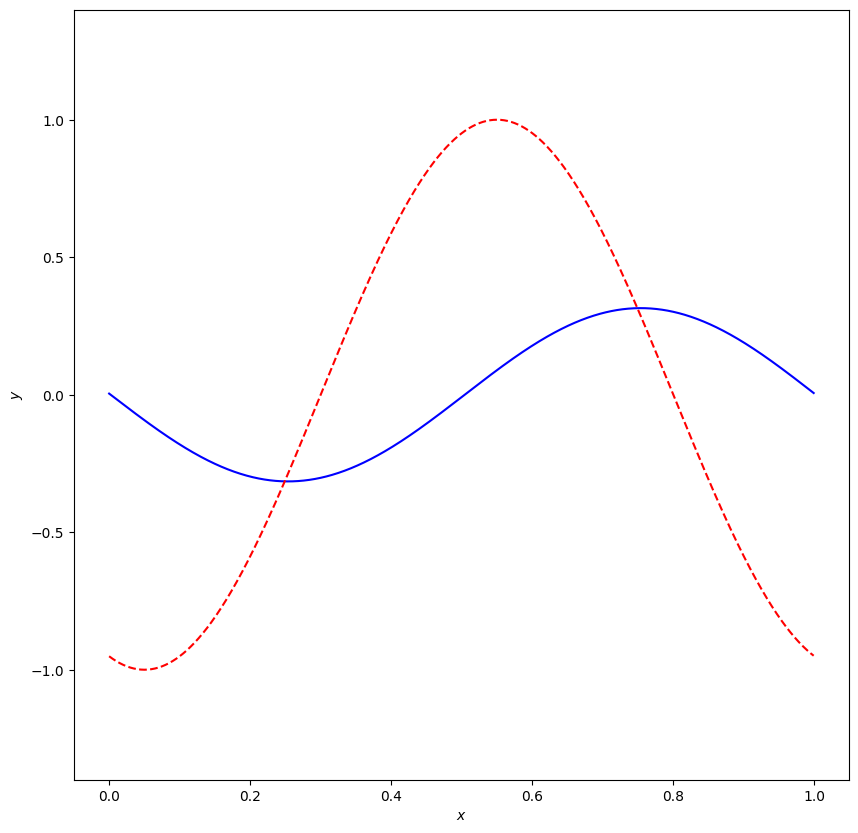

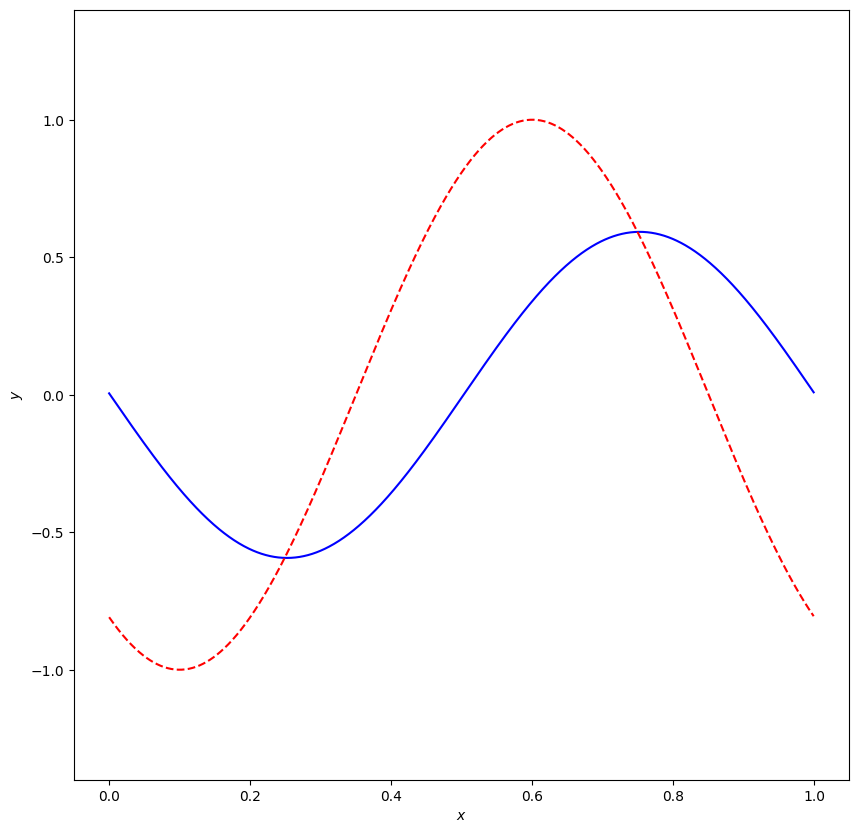

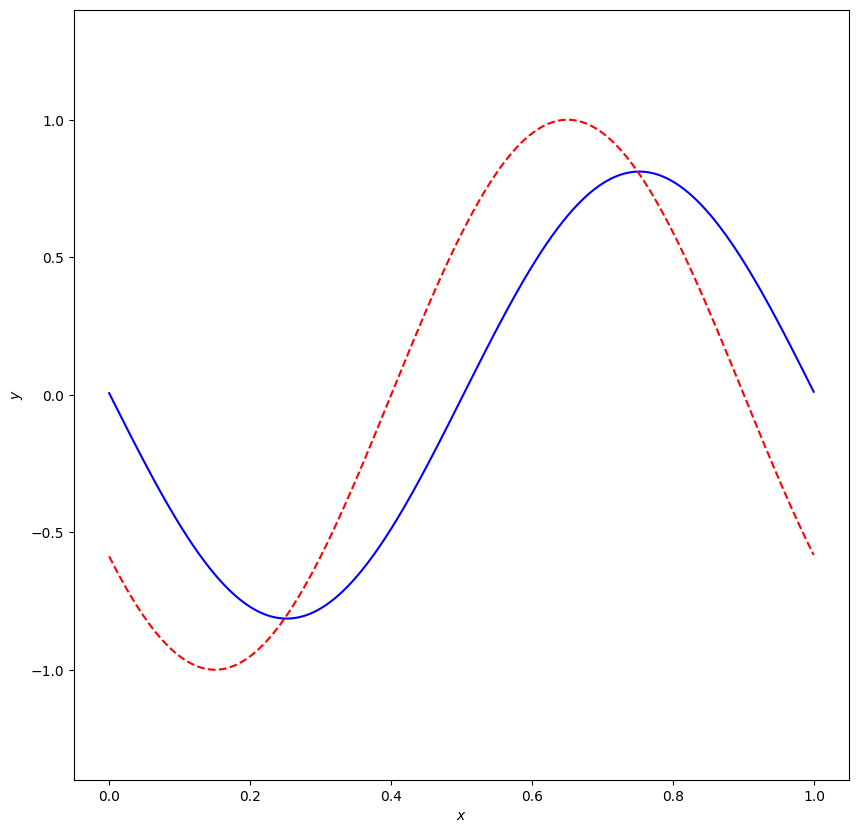

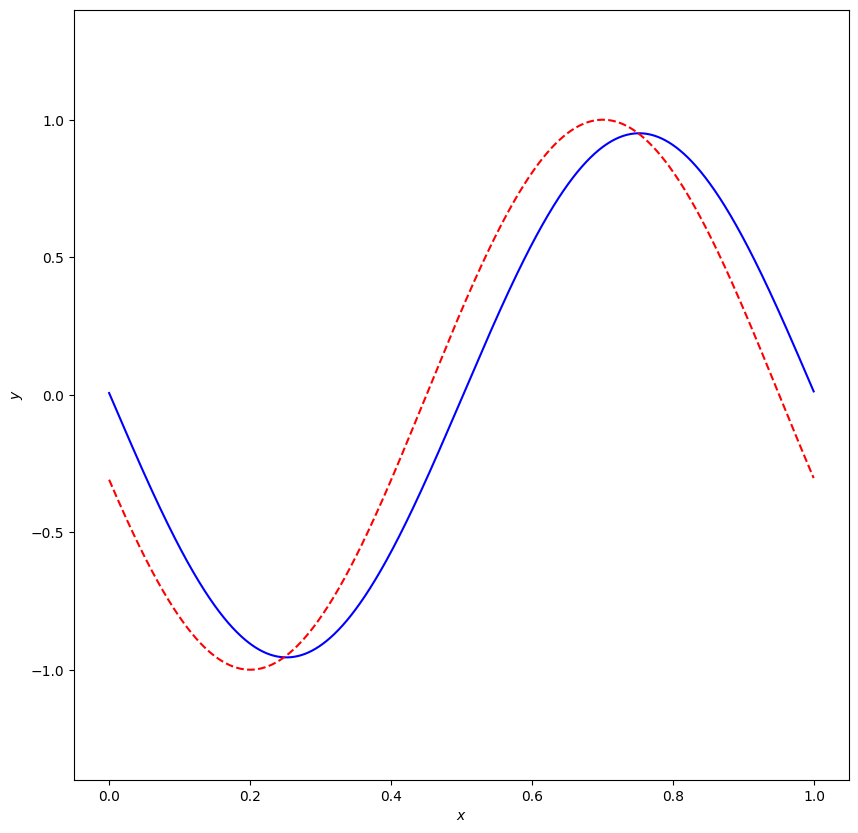

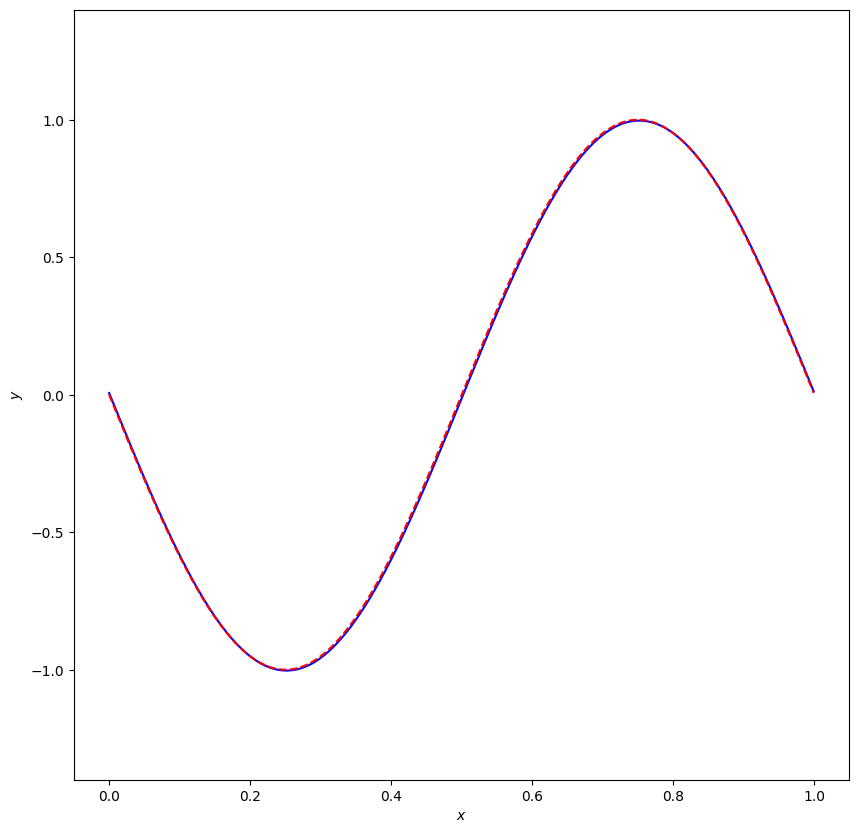

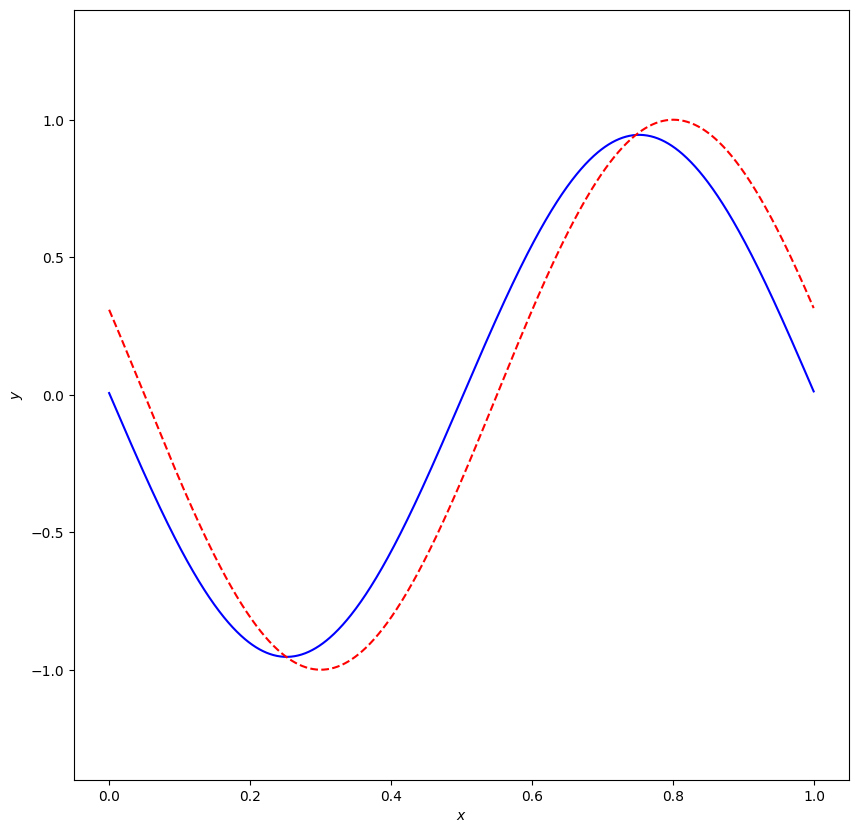

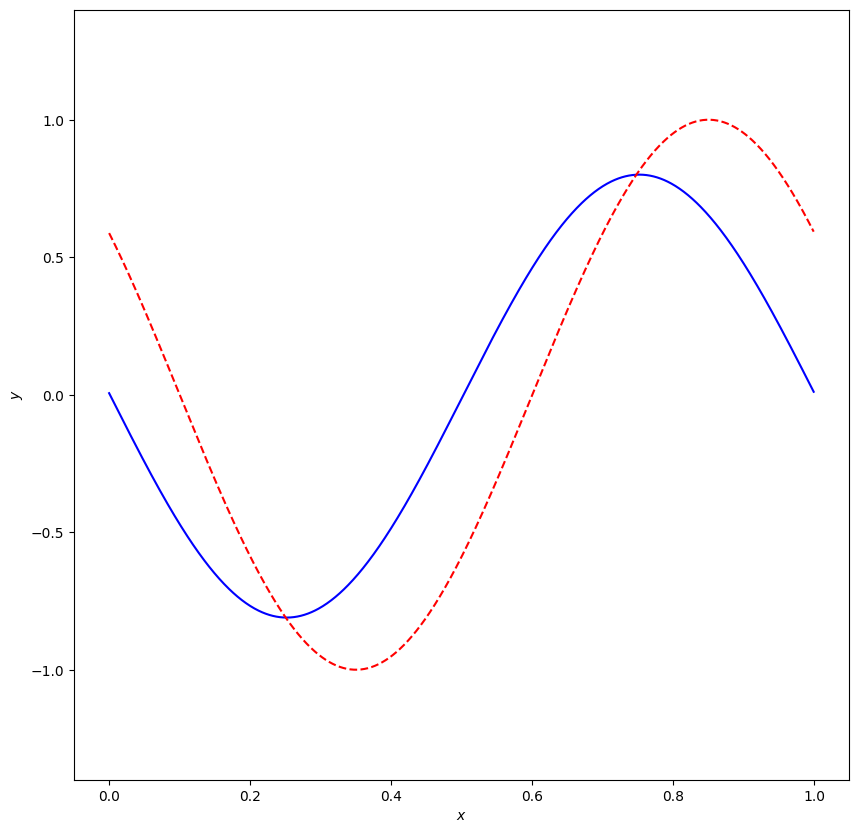

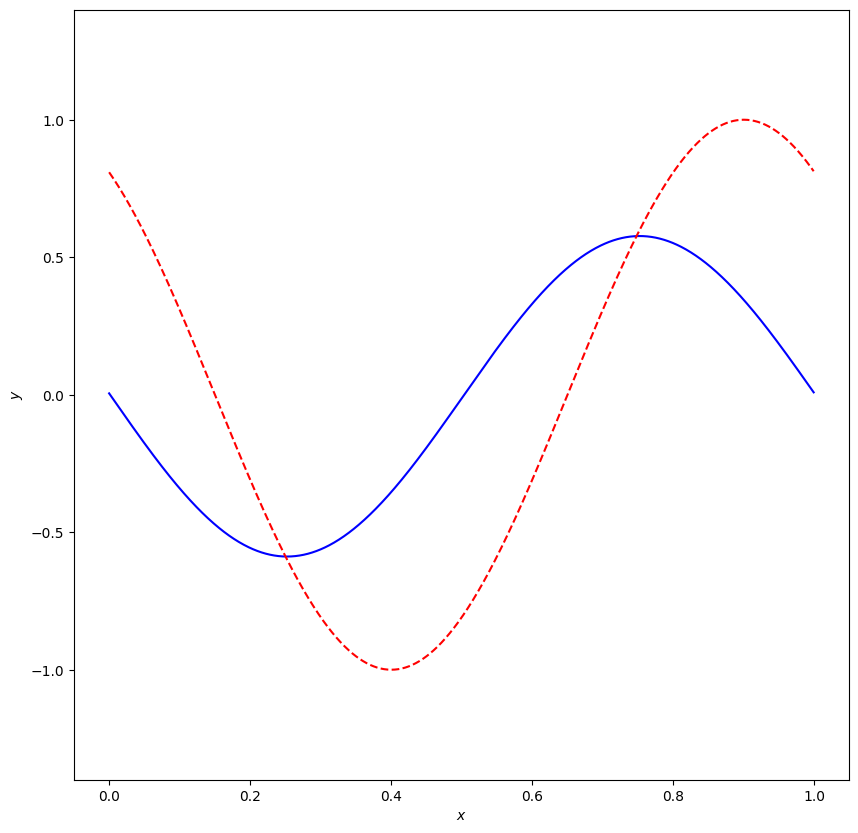

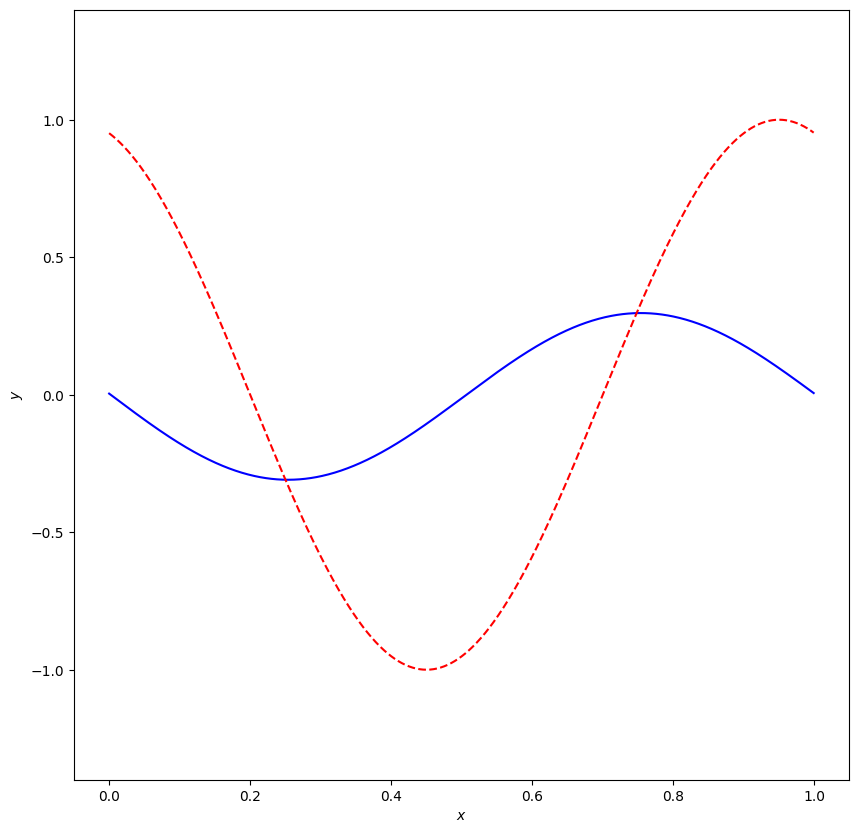

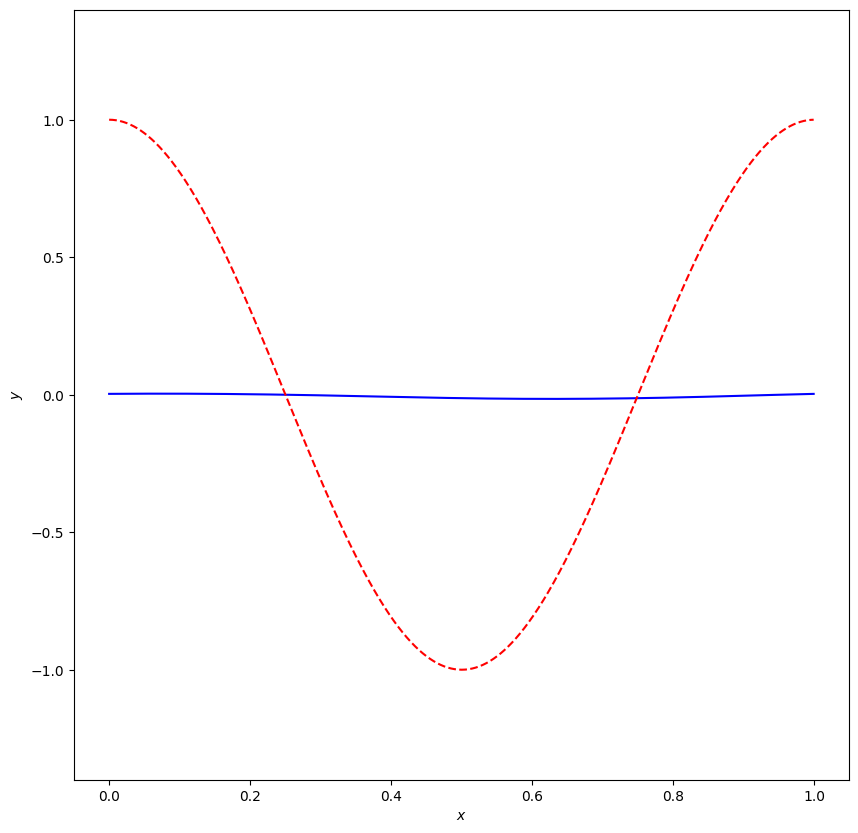

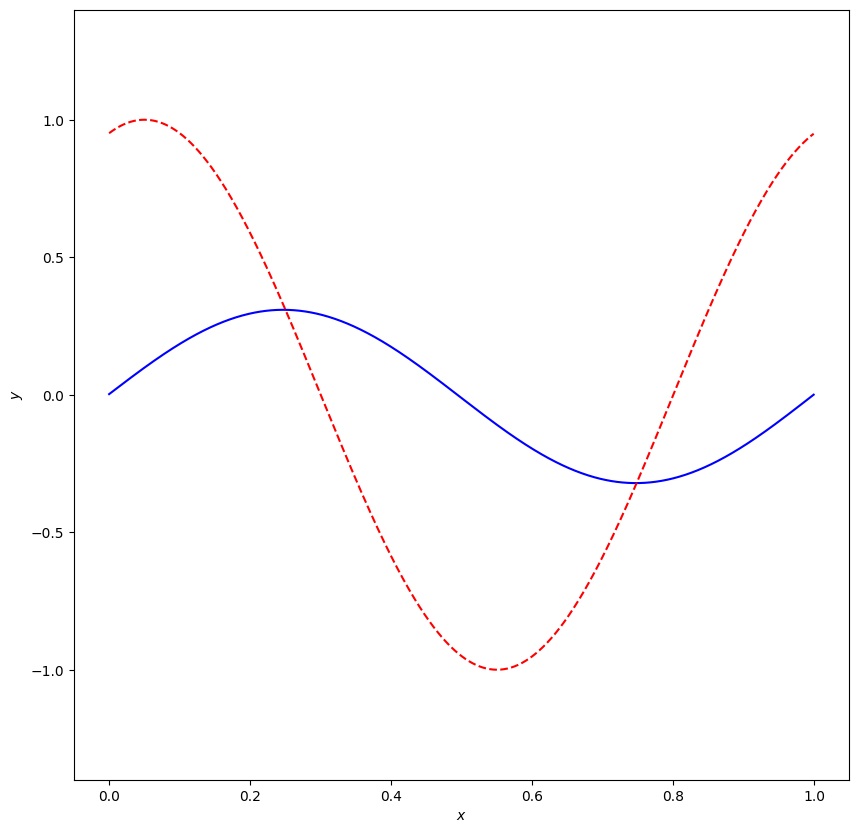

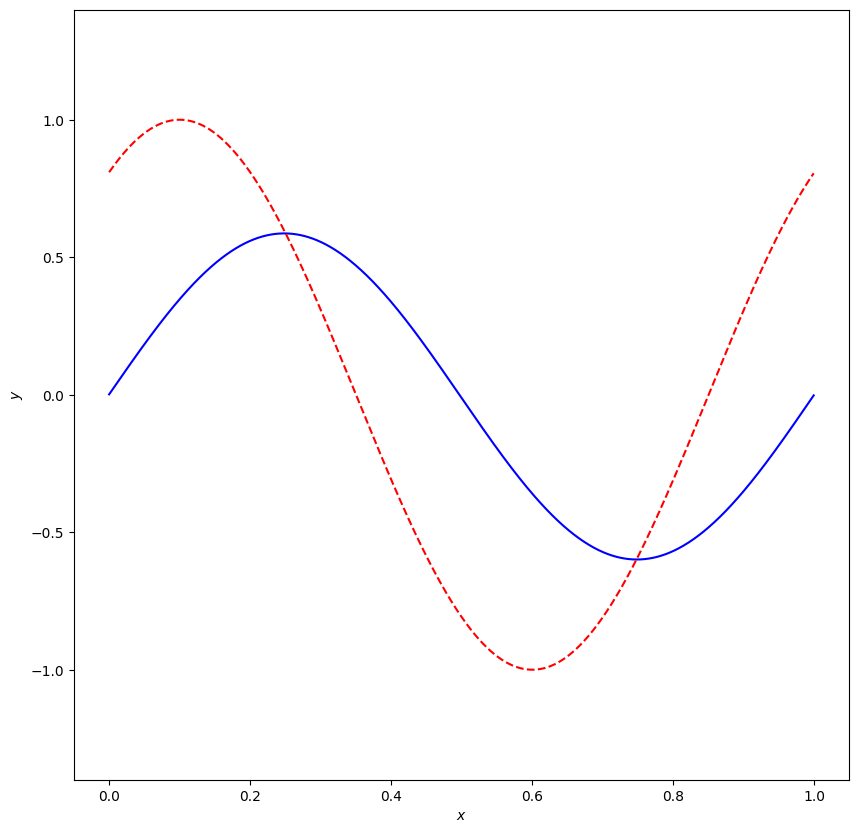

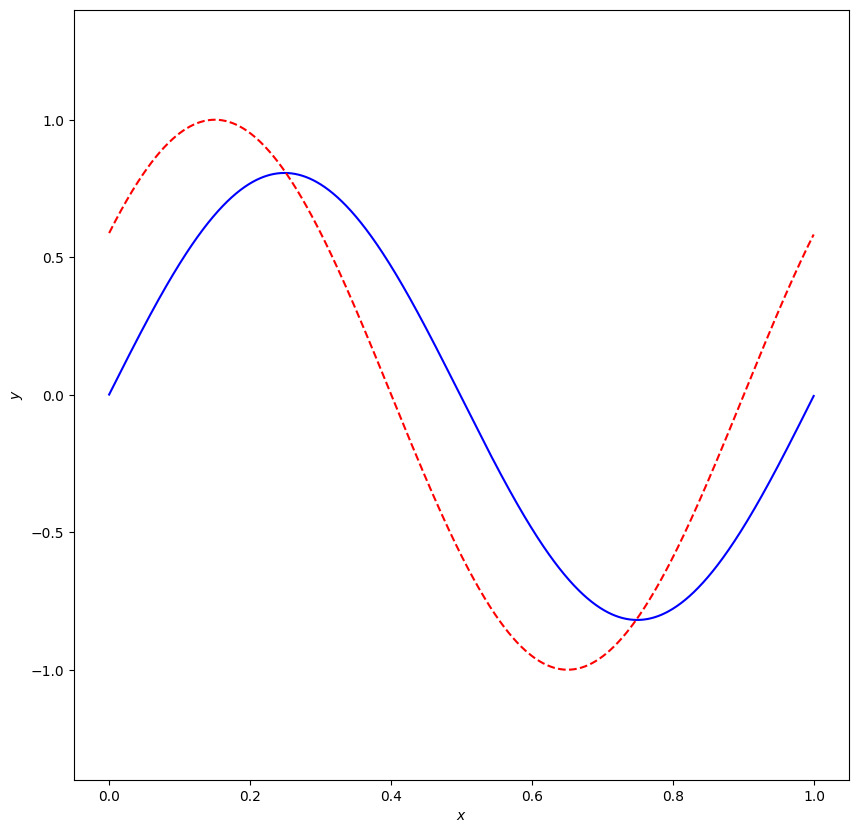

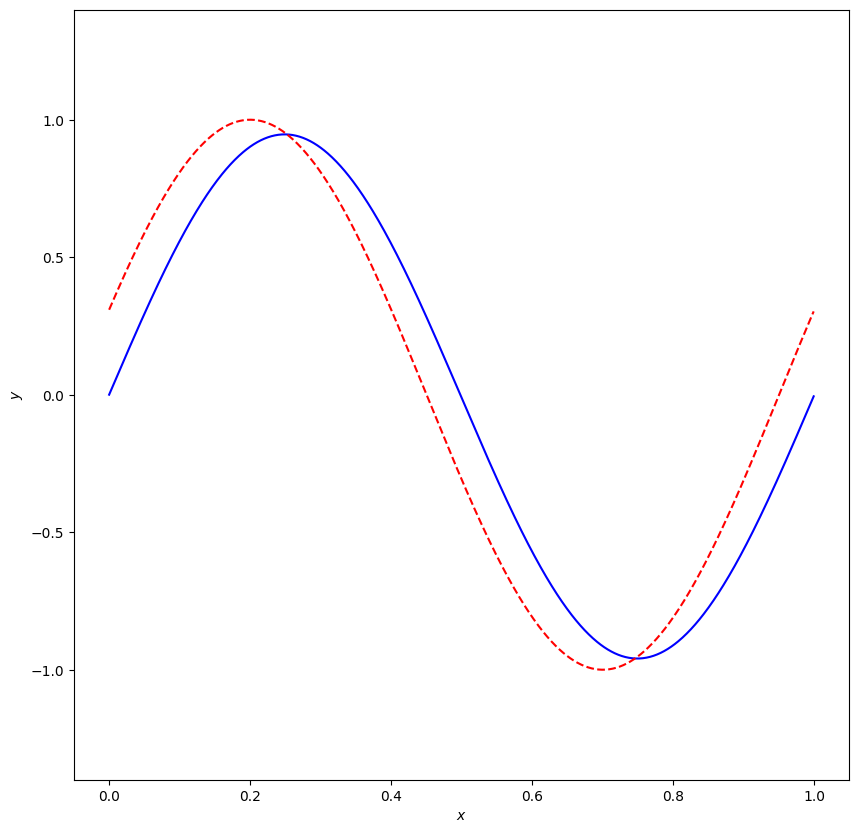

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math

N = 1000
alpha = 1.
M = int(N/alpha)
delta = int(M/20)
print('M =', M)
print('delta =', delta)
dt = 1/M
dx = 1/N
vel = 1

u = np.empty(N + 2)
v = np.empty(N)
v_theo = np.empty(N)
s = np.empty(N + 2)
r = np.empty(N + 2)
x = np.empty(N)
uf = np.empty(N)

for i in range(N):
    x[i] = i * dx
    u[i + 1] = np.sin(x[i] * 2 * math.pi)
    v[i] = u[i + 1]
    
u[0] = u[N]
u[N + 1] = u[1]

for i in range(N):
    s[i+1] = 0. 
    r[i+1] = (v[i]-u[i])/dx

s[0] = s[N]
s[N+1] = s[1]
r[0] = r[N]
r[N+1] = r[1]

for i in range(N):
    s[i+1] = s[i+1] + 0.5*alpha*(r[i+1]-r[i])

for j in range(M):

    for i in range(N):
        v[i] = v[i] + (alpha/N)*s[i+1]

    if j % delta == 0:
        plt.figure(figsize=(10,10))
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.ylim(-1.4,1.4)
        plt.plot(x,v,color='blue')
        for k in range(N):
            v_theo[k] = np.sin(2*math.pi*(k/N - j/M))        
        plt.plot(x,v_theo,color='red', linestyle='dashed')
        plt.show()
    
    for i in range(N):
        r[i+1] = r[i+1] + alpha*(s[i+2]-s[i+1])
        s[i+1] = s[i+1] + alpha*(r[i+1]-r[i])

    s[0] = s[N]
    s[N+1] = s[1]
    r[0] = r[N]
    r[N+1] = r[1]

# P2: Von Neumuann para FTCS

* En el primer problema se pide demostrar, de manera anlítica, que el rango de estabilidad del método Runge Kutta de orden 2 es $-2 \leq h\lambda \leq 0$ al resolver la ecuación siguente:

$$
\frac{d \vec{y}}{dt} = \lambda \vec{y}
$$

* Para esto, recordamos los pasos que constituyen el método RK2 y sobre los se trabajará para mostrar el rango estable. Primero, los pasos $k_1$ y $k_2$ en base a los cuáles se estima el siguiente paso:

$$
\vec{k}_1 = h \vec{f}(\vec{t}_n, \vec{y}_n)
$$
$$
\vec{k}_2 = h \vec{f}(\vec{t}_{n + \frac{1}{2}}, (\vec{y}_n + \vec{k}_2/2)) 
$$

* Evaluando en la ecuación correspondiente:

$$
\vec{k}_1 = h \lambda \vec{y}_n
$$
$$
\vec{k}_2 = h \lambda \vec{y}_n (1 + \frac{h \lambda}{2}) 
$$

* Con esto, el paso $n + 1$ quedaría de la siguiente manera:

$$
\vec{y}_{n + 1} = \vec{y}_n (1 + h \lambda + \frac{(h \lambda)^2}{2})
$$

* Ahora, tomando $\vec{y}  = \bar{\vec{y}} + \vec{\mathcal{E}}$, donde $\bar{\vec{y}}$ satisface la relación de recurrencia, se puede restar esos términos y quedarse con la recurrencia para el error: 

$$
\vec{\mathcal{E}}_{n + 1} = \vec{\mathcal{E}}_n (1 + h \lambda + \frac{(h \lambda)^2}{2})
$$

* Definiendo la expresión entre paréntesis como $\gamma(h\lambda)$ , la condición de estabilidad (es decir, que el error no sea creciente), se expresa como:

$$
| \gamma(h\lambda) | \leq 1 \implies | 1 + h \lambda + \frac{(h \lambda)^2}{2} | \leq 1   
$$

* Notando que, si $\lambda > 0$, la relación de arriba sería siempre falsa, por lo que se toma el caso $\lambda \leq 0$ y considerando $h > 0$, se tiene:

$$
\begin{aligned}
&&-1 \leq 1 + h \lambda + \frac{(h \lambda)^2}{2}  &\leq 1 \\
&\implies &-2 \leq h \lambda + \frac{(h \lambda)^2}{2}  &\leq 0 \\
&\implies &h \lambda + \frac{(h \lambda)^2}{2}  &\leq 0  \\
&&h \lambda + \frac{(h \lambda)^2}{2} &\geq -2
\end{aligned}
$$

* De la primera desigualdad se obtiene factorizando y en la igualdad que $h\lambda = 0$ y que $(1 + h\lambda/2) = 0$, de donde $h\lambda = -2$, límites entre los cuáles se cumplen ambas desigualdades. Por lo tanto, el rango de estabilidad para RK2 en este problema es:

$$
-2 \leq h \lambda \leq 0
$$

# P3: Estabilidad Incondicional de Crank Nicholson

M= 126


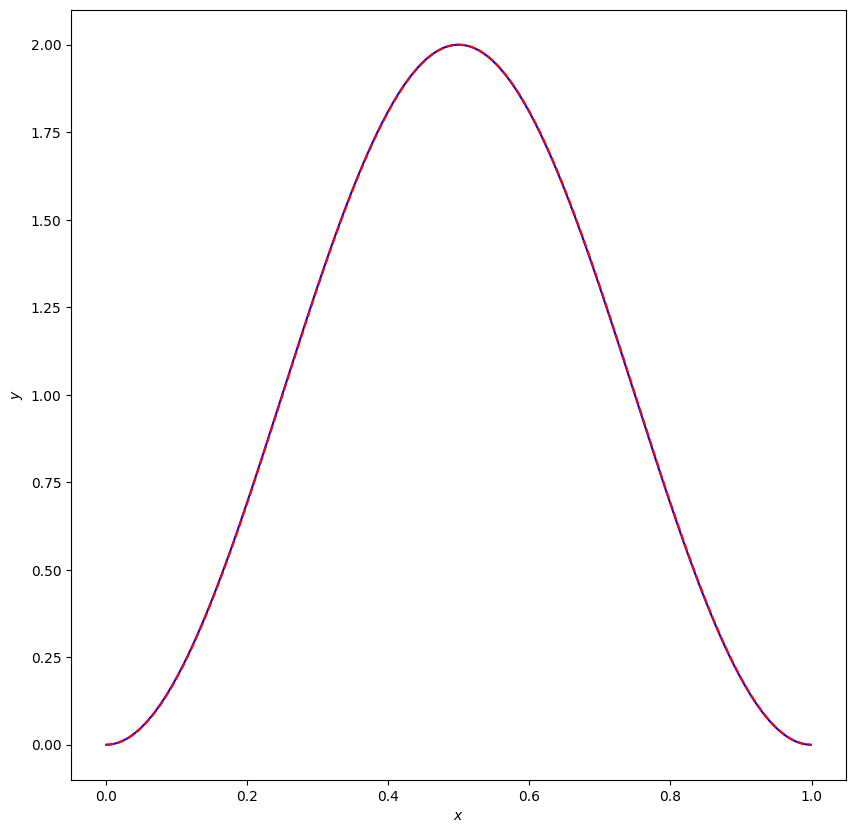

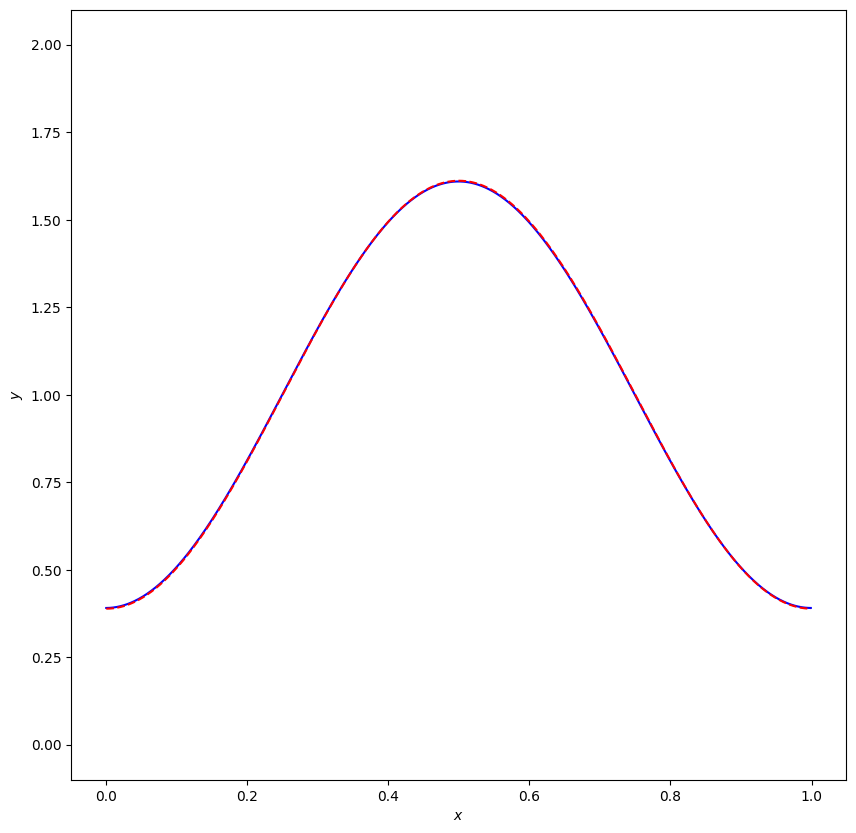

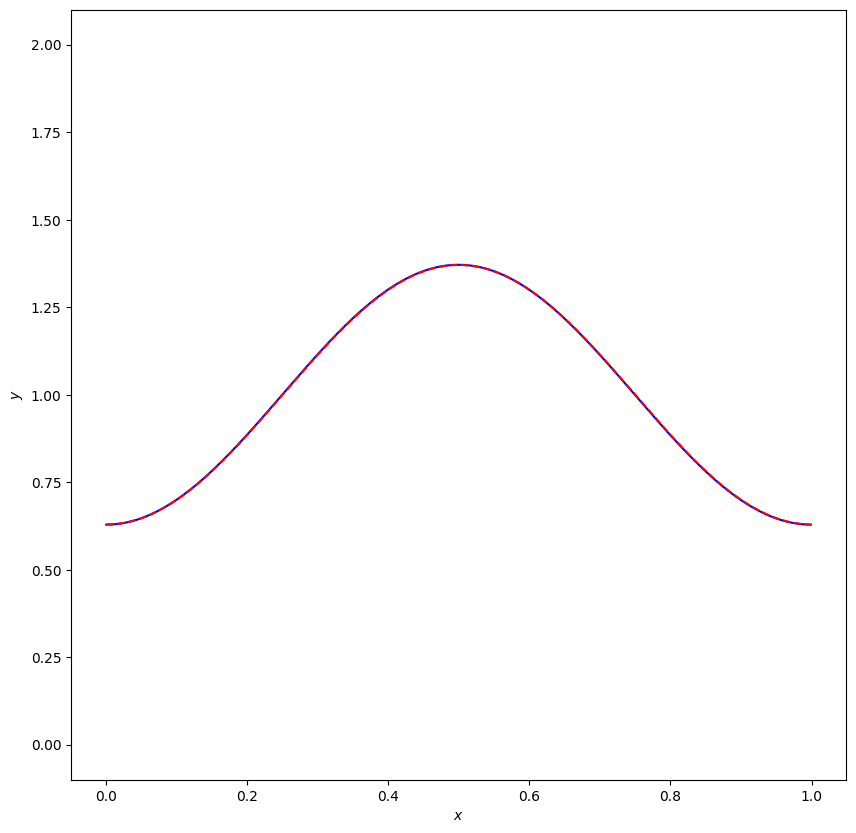

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

N=1000
alpha=200.
M=int(N**2/(alpha*4*math.pi**2))
delta = int(M/20)
print('M=',M)
v=np.empty(N)
v_theo=np.empty(N)
xs=np.empty(N)
A = np.empty((N,N))
x = np.empty(N)
y = np.empty(N)
for i in range(N):
    for j in range(N):
        if i == j:
            A[i,j] = 1+2*alpha
        else:
            if abs(i-j) == 1:
                A[i,j] = -alpha
            else:
                A[i,j] = 0.
A[0,0] = 1+alpha
A[N-1,N-1] = 1+alpha

A_1 = np.linalg.inv(A)

for i in range(N):
    v[i] = 1. - np.cos((i+.5)*2*math.pi/N)
    v_theo[i] = 1 - np.cos(2*math.pi*i/N)
    xs[i] = i/N
count=0
for t in range(M + 1):
    if t in (0, int(M/2), M):
        plt.figure(figsize=(10,10))
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.ylim(-.1,2.1)
        plt.plot(xs,v,color='blue')#'bo', markersize=1)
        plt.plot(xs,v_theo,color='red',linestyle='dashed')
        plt.show()
    v = np.dot(v, A_1)           
    for i in range(N):
        v_theo[i] = 1 - np.cos(2*math.pi*i/N)*np.exp(-t/M)